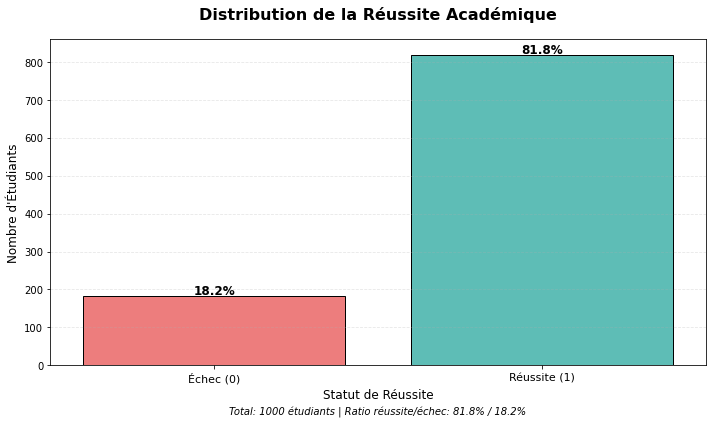

In [21]:
# Graphique 1: Distribution de la cible - VERSION CORRIGÉE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv('dataset_strict_7features.csv')

plt.figure(figsize=(10, 6))

# Palette de couleurs professionnelle
colors = ['#FF6B6B', '#4ECDC4']

# Diagramme à barres - CORRECTION: utiliser hue ou palette séparément
ax = sns.countplot(x='Reussite_binaire', data=df, palette=colors, edgecolor='black', 
                   hue='Reussite_binaire', legend=False)  # Ajout de hue et legend=False

# Ajouter les pourcentages sur les barres
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center', fontsize=12, fontweight='bold')

# Personnalisation
plt.title('Distribution de la Réussite Académique', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Statut de Réussite', fontsize=12)
plt.ylabel('Nombre d\'Étudiants', fontsize=12)
plt.xticks([0, 1], ['Échec (0)', 'Réussite (1)'], fontsize=11)

# Ajouter une grille subtile
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajouter un texte d'analyse
plt.text(0.5, -0.15, 
         f'Total: {total} étudiants | Ratio réussite/échec: {(df["Reussite_binaire"].mean()*100):.1f}% / {100-(df["Reussite_binaire"].mean()*100):.1f}%',
         transform=plt.gca().transAxes,
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

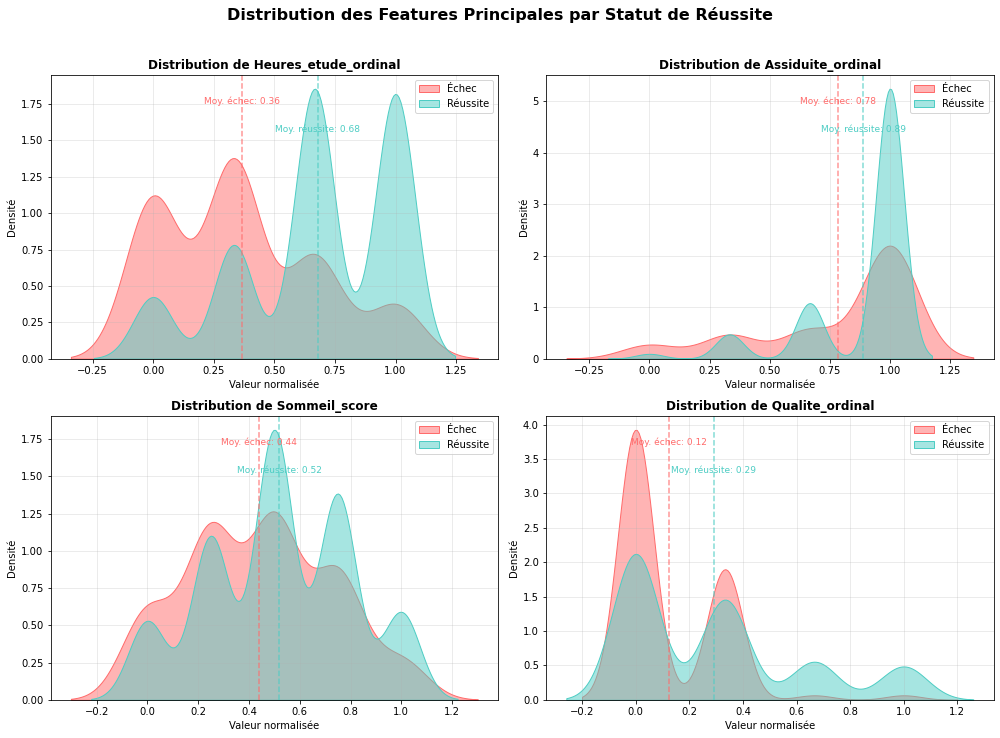

In [15]:
# Graphique 3: Distribution comparée des features principales
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution des Features Principales par Statut de Réussite', 
             fontsize=16, fontweight='bold', y=1.02)

# Features à visualiser (les plus importantes)
features_to_plot = ['Heures_etude_ordinal', 'Assiduite_ordinal', 
                    'Sommeil_score', 'Qualite_ordinal']

for idx, feature in enumerate(features_to_plot):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Diagramme de densité (KDE)
    sns.kdeplot(data=df[df['Reussite_binaire'] == 0][feature], 
                label='Échec', fill=True, alpha=0.5, color='#FF6B6B', ax=ax)
    sns.kdeplot(data=df[df['Reussite_binaire'] == 1][feature], 
                label='Réussite', fill=True, alpha=0.5, color='#4ECDC4', ax=ax)
    
    # Personnalisation
    ax.set_title(f'Distribution de {feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Valeur normalisée' if df[feature].max() <= 1 else 'Score', fontsize=10)
    ax.set_ylabel('Densité', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)
    
    # Ajouter les moyennes
    mean_0 = df[df['Reussite_binaire'] == 0][feature].mean()
    mean_1 = df[df['Reussite_binaire'] == 1][feature].mean()
    
    ax.axvline(mean_0, color='#FF6B6B', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.axvline(mean_1, color='#4ECDC4', linestyle='--', alpha=0.7, linewidth=1.5)
    
    # Annotation des moyennes
    ax.text(mean_0, ax.get_ylim()[1]*0.9, f'Moy. échec: {mean_0:.2f}', 
            color='#FF6B6B', fontsize=9, ha='center')
    ax.text(mean_1, ax.get_ylim()[1]*0.8, f'Moy. réussite: {mean_1:.2f}', 
            color='#4ECDC4', fontsize=9, ha='center')

plt.tight_layout()
plt.show()

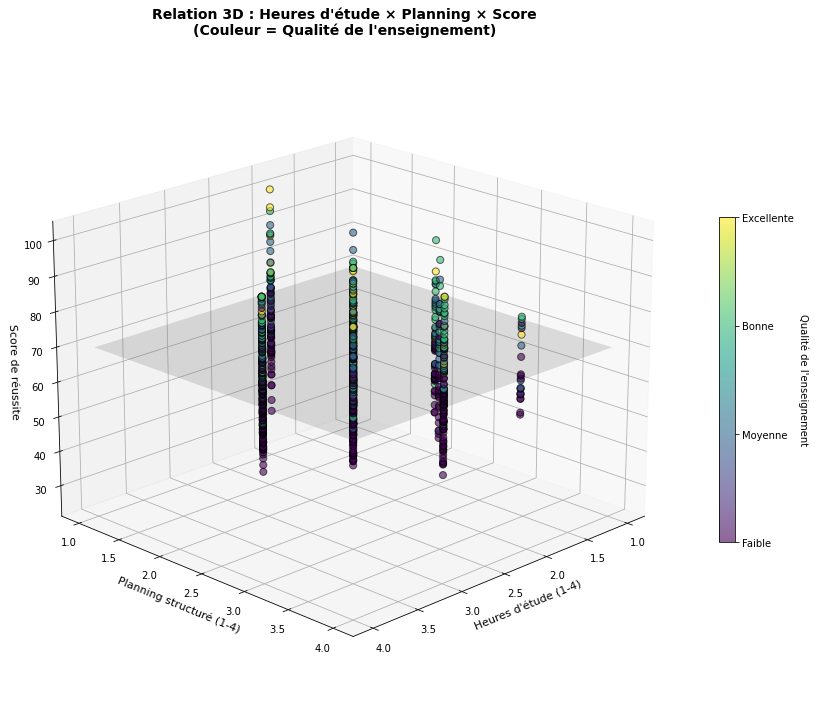

In [10]:
# 5. Scatter plot 3D avec coloration
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convertir les catégories en valeurs numériques
x = df['Heures_etude_semaine'].map({'Moins de 3h': 1, '3-6 h': 2, '6-10 h': 3, 'Plus de 10 h': 4})
y = df['Planning_structuré'].map({'Non': 1, 'Rarement': 2, 'La plupart du temps': 3, 'Oui, toujours': 4})
z = df['Score']

# Créer des catégories de couleur basées sur la qualité d'enseignement
quality_map = {'Faible': 0, 'Moyenne': 1, 'Bonne': 2, 'Excellente': 3}
colors_map = {0: 'red', 1: 'orange', 2: 'green', 3: 'blue'}
df['Quality_num'] = df['Qualite_enseignement'].map(quality_map)
colors = df['Quality_num'].map(colors_map)

# Créer le scatter plot 3D
scatter = ax.scatter(x, y, z, c=df['Quality_num'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')

# Personnaliser les axes
ax.set_xlabel('Heures d\'étude (1-4)', fontsize=11)
ax.set_ylabel('Planning structuré (1-4)', fontsize=11)
ax.set_zlabel('Score de réussite', fontsize=11)
ax.set_title('Relation 3D : Heures d\'étude × Planning × Score\n(Couleur = Qualité de l\'enseignement)', 
             fontsize=14, fontweight='bold', pad=20)

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label('Qualité de l\'enseignement', rotation=270, labelpad=15)
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['Faible', 'Moyenne', 'Bonne', 'Excellente'])

# Améliorer la perspective
ax.view_init(elev=20, azim=45)

# Ajouter un plan de référence
xx, yy = np.meshgrid([1, 4], [1, 4])
zz = np.array([[df['Score'].mean()]*2]*2)
ax.plot_surface(xx, yy, zz, alpha=0.2, color='gray')

plt.tight_layout()
plt.show()

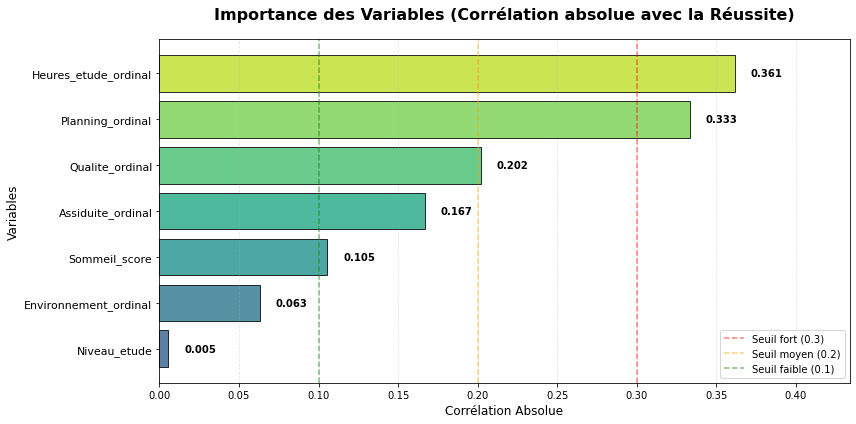

In [17]:
# Graphique 4: Importance des features (corrélation absolue avec la cible)
plt.figure(figsize=(12, 6))

# Calculer l'importance (corrélation absolue avec la cible)
features = [col for col in df.columns if col != 'Reussite_binaire']
importance = df[features].corrwith(df['Reussite_binaire']).abs().sort_values(ascending=True)

# Barres horizontales
bars = plt.barh(range(len(importance)), importance.values, 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(importance))),
                edgecolor='black', alpha=0.8)

# Ajouter les valeurs
for i, (val, bar) in enumerate(zip(importance.values, bars)):
    plt.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=10, fontweight='bold')

# Personnalisation
plt.title('Importance des Variables (Corrélation absolue avec la Réussite)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Corrélation Absolue', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.yticks(range(len(importance)), importance.index, fontsize=11)

# Ligne de référence
plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Seuil fort (0.3)')
plt.axvline(x=0.2, color='orange', linestyle='--', alpha=0.5, label='Seuil moyen (0.2)')
plt.axvline(x=0.1, color='green', linestyle='--', alpha=0.5, label='Seuil faible (0.1)')

plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlim(0, importance.max() * 1.2)

plt.tight_layout()
plt.show()

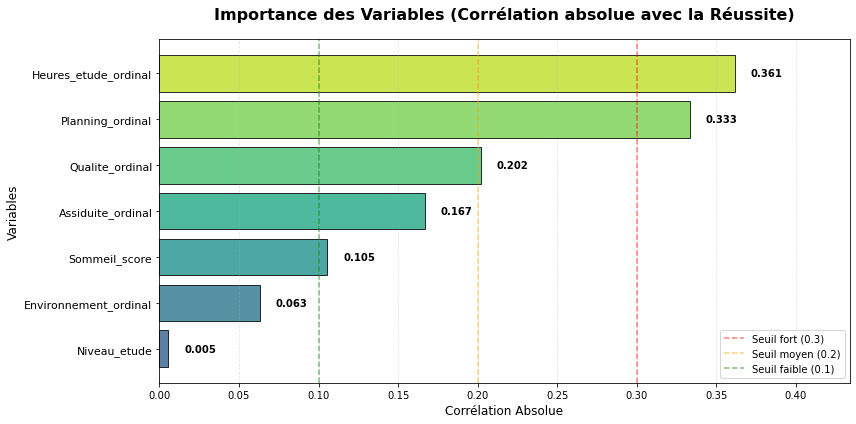

In [18]:
# Graphique 4: Importance des features (corrélation absolue avec la cible)
plt.figure(figsize=(12, 6))

# Calculer l'importance (corrélation absolue avec la cible)
features = [col for col in df.columns if col != 'Reussite_binaire']
importance = df[features].corrwith(df['Reussite_binaire']).abs().sort_values(ascending=True)

# Barres horizontales
bars = plt.barh(range(len(importance)), importance.values, 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(importance))),
                edgecolor='black', alpha=0.8)

# Ajouter les valeurs
for i, (val, bar) in enumerate(zip(importance.values, bars)):
    plt.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=10, fontweight='bold')

# Personnalisation
plt.title('Importance des Variables (Corrélation absolue avec la Réussite)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Corrélation Absolue', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.yticks(range(len(importance)), importance.index, fontsize=11)

# Ligne de référence
plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Seuil fort (0.3)')
plt.axvline(x=0.2, color='orange', linestyle='--', alpha=0.5, label='Seuil moyen (0.2)')
plt.axvline(x=0.1, color='green', linestyle='--', alpha=0.5, label='Seuil faible (0.1)')

plt.legend(loc='lower right')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.xlim(0, importance.max() * 1.2)

plt.tight_layout()
plt.show()

<Figure size 1008x720 with 0 Axes>

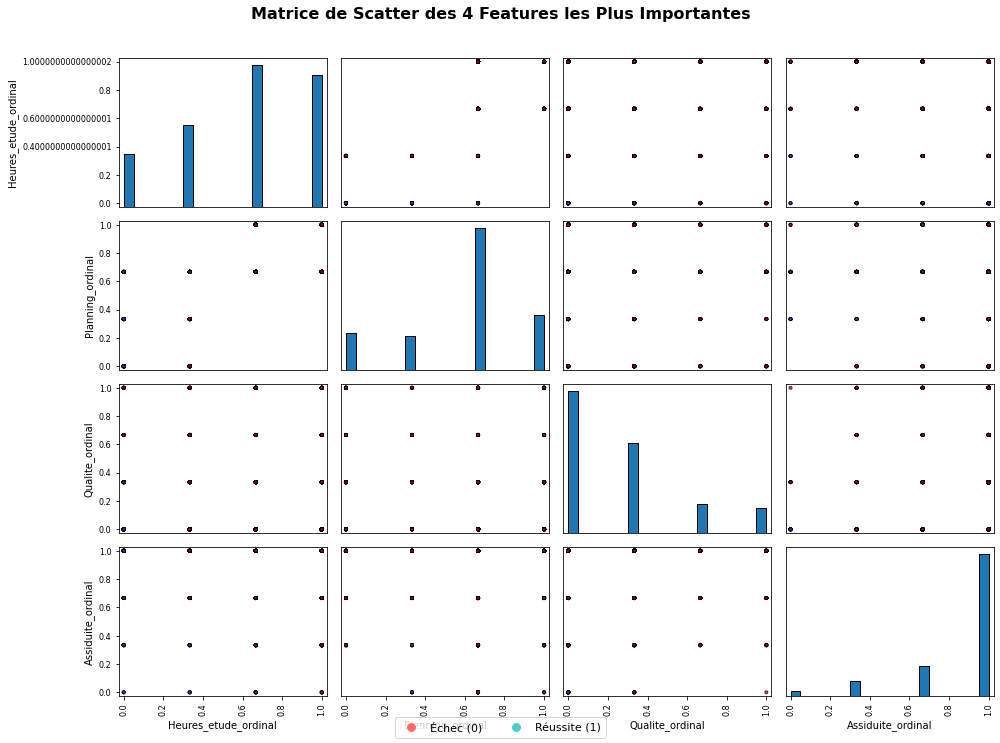

In [19]:
# Graphique 5: Scatter matrix des features les plus importantes
from pandas.plotting import scatter_matrix

plt.figure(figsize=(14, 10))

# Sélectionner les 4 features les plus corrélées avec la cible
top_features = importance.sort_values(ascending=False).head(4).index.tolist()

# Créer un dataframe avec seulement ces features + la cible
scatter_df = df[top_features + ['Reussite_binaire']].copy()

# Scatter matrix avec coloration par classe
scatter_matrix = pd.plotting.scatter_matrix(scatter_df.drop('Reussite_binaire', axis=1), 
                                           figsize=(14, 10),
                                           diagonal='hist',
                                           alpha=0.7,
                                           c=scatter_df['Reussite_binaire'],
                                           cmap='coolwarm',
                                           edgecolor='black',
                                           hist_kwds={'bins': 20, 'edgecolor': 'black'})

# Personnalisation
plt.suptitle('Matrice de Scatter des 4 Features les Plus Importantes', 
             fontsize=16, fontweight='bold', y=1.02)

# Améliorer la lisibilité
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    ax.tick_params(labelsize=8)

# Ajouter une légende colorée
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Échec (0)',
                          markerfacecolor='#FF6B6B', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Réussite (1)',
                          markerfacecolor='#4ECDC4', markersize=10)]
plt.figlegend(handles=legend_elements, loc='lower center', ncol=2, fontsize=11)

plt.tight_layout()
plt.show()